In [18]:
pwd

'/content'

Upload Dataset File from https://www.iexindia.com/. Specifically I used the "Area Prices" from "Day Ahead Market" including all fields of delivery period for the "last 8 days", and interval of "15-minute block". 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns  
df = pd.read_excel (r'/content/PriceMinute.xlsx', sheet_name='PriceMinute')
#Import appropriate libraries and excel file

In [4]:
df

,Date | Hour | Time Block,Unnamed: 1,Unnamed: 2,A1,A2,E1,E2,N1,N2,N3,S1,S2,S3,W1,W2,W3,MCP
0,16-11-2020,1,00:00 - 00:15,1999.99,1999.99,1999.99,1999.99,1999.99,1999.99,1999.99,1999.99,1999.99,1999.99,1999.99,1999.99,1999.99,1999.99
1,NaN,NaN,00:15 - 00:30,1999.92,1999.92,1999.92,1999.92,1999.92,1999.92,1999.92,1999.92,1999.92,1999.92,1999.92,1999.92,1999.92,1999.92
2,NaN,NaN,00:30 - 00:45,1999.89,1999.89,1999.89,1999.89,1999.89,1999.89,1999.89,1999.89,1999.89,1999.89,1999.89,1999.89,1999.89,1999.89
3,NaN,NaN,00:45 - 01:00,1999.81,1999.81,1999.81,1999.81,1999.81,1999.81,1999.81,1999.81,1999.81,1999.81,1999.81,1999.81,1999.81,1999.81
4,NaN,2,01:00 - 01:15,1999.78,1999.78,1999.78,1999.78,1999.78,1999.78,1999.78,1999.78,1999.78,1999.78,1999.78,1999.78,1999.78,1999.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,NaN,Peak,NaN,3148.75,3148.75,3148.75,3148.75,3148.75,3148.75,3148.75,3148.75,3148.75,3148.75,3148.75,3148.75,3148.75,3148.75
814,NaN,Non Peak,NaN,2809.19,2809.19,2809.19,2809.19,2809.19,2809.19,2809.19,2809.19,2809.19,2809.19,2809.19,2809.19,2809.19,2809.19
815,NaN,Day,NaN,3031.38,3031.38,3031.38,3031.38,3031.38,3031.38,3031.38,3031.38,3031.38,3031.38,3031.38,3031.38,3031.38,3031.38
816,NaN,Night,NaN,2320.84,2320.84,2320.84,2320.84,2320.84,2320.84,2320.84,2320.84,2320.84,2320.84,2320.84,2320.84,2320.84,2320.84


**Data Imputation**

In [5]:
df.rename(columns={'Date | Hour | Time Block': 'Date', 'Unnamed: 1': 'Hour', 'Unnamed: 2': 'Time'}, inplace=True)
#Rename columns for easier understanding

In [6]:
df

,Date,Hour,Time,A1,A2,E1,E2,N1,N2,N3,S1,S2,S3,W1,W2,W3,MCP
0,16-11-2020,1,00:00 - 00:15,1999.99,1999.99,1999.99,1999.99,1999.99,1999.99,1999.99,1999.99,1999.99,1999.99,1999.99,1999.99,1999.99,1999.99
1,NaN,NaN,00:15 - 00:30,1999.92,1999.92,1999.92,1999.92,1999.92,1999.92,1999.92,1999.92,1999.92,1999.92,1999.92,1999.92,1999.92,1999.92
2,NaN,NaN,00:30 - 00:45,1999.89,1999.89,1999.89,1999.89,1999.89,1999.89,1999.89,1999.89,1999.89,1999.89,1999.89,1999.89,1999.89,1999.89
3,NaN,NaN,00:45 - 01:00,1999.81,1999.81,1999.81,1999.81,1999.81,1999.81,1999.81,1999.81,1999.81,1999.81,1999.81,1999.81,1999.81,1999.81
4,NaN,2,01:00 - 01:15,1999.78,1999.78,1999.78,1999.78,1999.78,1999.78,1999.78,1999.78,1999.78,1999.78,1999.78,1999.78,1999.78,1999.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,NaN,Peak,NaN,3148.75,3148.75,3148.75,3148.75,3148.75,3148.75,3148.75,3148.75,3148.75,3148.75,3148.75,3148.75,3148.75,3148.75
814,NaN,Non Peak,NaN,2809.19,2809.19,2809.19,2809.19,2809.19,2809.19,2809.19,2809.19,2809.19,2809.19,2809.19,2809.19,2809.19,2809.19
815,NaN,Day,NaN,3031.38,3031.38,3031.38,3031.38,3031.38,3031.38,3031.38,3031.38,3031.38,3031.38,3031.38,3031.38,3031.38,3031.38
816,NaN,Night,NaN,2320.84,2320.84,2320.84,2320.84,2320.84,2320.84,2320.84,2320.84,2320.84,2320.84,2320.84,2320.84,2320.84,2320.84


In [7]:
df=df.iloc[:768,]
#Taking rows from 0 to 768 for leaving out the rest of the part consisiting of summary statistics for 8 days

In [8]:
df
#Simply displaying

,Date,Hour,Time,A1,A2,E1,E2,N1,N2,N3,S1,S2,S3,W1,W2,W3,MCP
0,16-11-2020,1,00:00 - 00:15,1999.99,1999.99,1999.99,1999.99,1999.99,1999.99,1999.99,1999.99,1999.99,1999.99,1999.99,1999.99,1999.99,1999.99
1,NaN,NaN,00:15 - 00:30,1999.92,1999.92,1999.92,1999.92,1999.92,1999.92,1999.92,1999.92,1999.92,1999.92,1999.92,1999.92,1999.92,1999.92
2,NaN,NaN,00:30 - 00:45,1999.89,1999.89,1999.89,1999.89,1999.89,1999.89,1999.89,1999.89,1999.89,1999.89,1999.89,1999.89,1999.89,1999.89
3,NaN,NaN,00:45 - 01:00,1999.81,1999.81,1999.81,1999.81,1999.81,1999.81,1999.81,1999.81,1999.81,1999.81,1999.81,1999.81,1999.81,1999.81
4,NaN,2,01:00 - 01:15,1999.78,1999.78,1999.78,1999.78,1999.78,1999.78,1999.78,1999.78,1999.78,1999.78,1999.78,1999.78,1999.78,1999.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,NaN,NaN,22:45 - 23:00,2679.22,2679.22,2679.22,2679.22,2679.22,2679.22,2679.22,2679.22,2679.22,2679.22,2679.22,2679.22,2679.22,2679.22
764,NaN,24,23:00 - 23:15,2533.26,2533.26,2533.26,2533.26,2533.26,2533.26,2533.26,2533.26,2533.26,2533.26,2533.26,2533.26,2533.26,2533.26
765,NaN,NaN,23:15 - 23:30,2540.88,2540.88,2540.88,2540.88,2540.88,2540.88,2540.88,2540.88,2540.88,2540.88,2540.88,2540.88,2540.88,2540.88
766,NaN,NaN,23:30 - 23:45,2415.72,2415.72,2415.72,2415.72,2415.72,2415.72,2415.72,2415.72,2415.72,2415.72,2415.72,2415.72,2415.72,2415.72


In [9]:
df = df.replace(np.nan, '', regex=True)
#df.head(100)
#Replacing NaNs with blank spaces

In [10]:
df
#Redisplaying for the desired resultant dataframe

,Date,Hour,Time,A1,A2,E1,E2,N1,N2,N3,S1,S2,S3,W1,W2,W3,MCP
0,16-11-2020,1,00:00 - 00:15,1999.99,1999.99,1999.99,1999.99,1999.99,1999.99,1999.99,1999.99,1999.99,1999.99,1999.99,1999.99,1999.99,1999.99
1,,,00:15 - 00:30,1999.92,1999.92,1999.92,1999.92,1999.92,1999.92,1999.92,1999.92,1999.92,1999.92,1999.92,1999.92,1999.92,1999.92
2,,,00:30 - 00:45,1999.89,1999.89,1999.89,1999.89,1999.89,1999.89,1999.89,1999.89,1999.89,1999.89,1999.89,1999.89,1999.89,1999.89
3,,,00:45 - 01:00,1999.81,1999.81,1999.81,1999.81,1999.81,1999.81,1999.81,1999.81,1999.81,1999.81,1999.81,1999.81,1999.81,1999.81
4,,2,01:00 - 01:15,1999.78,1999.78,1999.78,1999.78,1999.78,1999.78,1999.78,1999.78,1999.78,1999.78,1999.78,1999.78,1999.78,1999.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,,,22:45 - 23:00,2679.22,2679.22,2679.22,2679.22,2679.22,2679.22,2679.22,2679.22,2679.22,2679.22,2679.22,2679.22,2679.22,2679.22
764,,24,23:00 - 23:15,2533.26,2533.26,2533.26,2533.26,2533.26,2533.26,2533.26,2533.26,2533.26,2533.26,2533.26,2533.26,2533.26,2533.26
765,,,23:15 - 23:30,2540.88,2540.88,2540.88,2540.88,2540.88,2540.88,2540.88,2540.88,2540.88,2540.88,2540.88,2540.88,2540.88,2540.88
766,,,23:30 - 23:45,2415.72,2415.72,2415.72,2415.72,2415.72,2415.72,2415.72,2415.72,2415.72,2415.72,2415.72,2415.72,2415.72,2415.72


In [11]:
df.A1 = pd.to_numeric(df.A1, errors='coerce').fillna(0).astype(np.float64) 
df.A2 = pd.to_numeric(df.A2, errors='coerce').fillna(0).astype(np.float64) 
df.E1 = pd.to_numeric(df.E1, errors='coerce').fillna(0).astype(np.float64) 
df.E2 = pd.to_numeric(df.E2, errors='coerce').fillna(0).astype(np.float64) 
df.N1 = pd.to_numeric(df.N1, errors='coerce').fillna(0).astype(np.float64) 
df.N2 = pd.to_numeric(df.N2, errors='coerce').fillna(0).astype(np.float64) 
df.N3 = pd.to_numeric(df.N3, errors='coerce').fillna(0).astype(np.float64) 
df.S1 = pd.to_numeric(df.S1, errors='coerce').fillna(0).astype(np.float64) 
df.S2 = pd.to_numeric(df.S2, errors='coerce').fillna(0).astype(np.float64) 
df.S3 = pd.to_numeric(df.S3, errors='coerce').fillna(0).astype(np.float64) 
df.W1 = pd.to_numeric(df.W1, errors='coerce').fillna(0).astype(np.float64) 
df.W2 = pd.to_numeric(df.W2, errors='coerce').fillna(0).astype(np.float64) 
df.W3 = pd.to_numeric(df.W3, errors='coerce').fillna(0).astype(np.float64) 
df.MCP = pd.to_numeric(df.MCP, errors='coerce').fillna(0).astype(np.float64) 
#Changing datatype from object to float so as to perform numerical operations

**Calculating Moving Average**

We will now be calculating moving average (simple moving average here)

Short rolling for small window sizes and Long rolling for large window sizes

After that simply ploting these two moving averages in the same plot

SMA is taken along the Column/Area Price 'A1'

In [12]:
short_rolling = df['A1'].rolling(window=98).mean()
short_rolling.head(100)
#Performing Simple Moving Average on Price A1 on a window of 98 rows i.e. smaller window = Short Rolling Average

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
         ...     
95            NaN
96            NaN
97    2381.012959
98    2381.016429
99    2381.017143
Name: A1, Length: 100, dtype: float64

In [13]:

long_rolling = df['A1'].rolling(window=766).mean()
long_rolling.tail(100)
#Performing Simple Moving Average on on Price A1 on a window of 766 rows i.e. longer window = Long Rolling Average

668            NaN
669            NaN
670            NaN
671            NaN
672            NaN
          ...     
763            NaN
764            NaN
765    2753.176958
766    2753.719687
767    2754.241971
Name: A1, Length: 100, dtype: float64

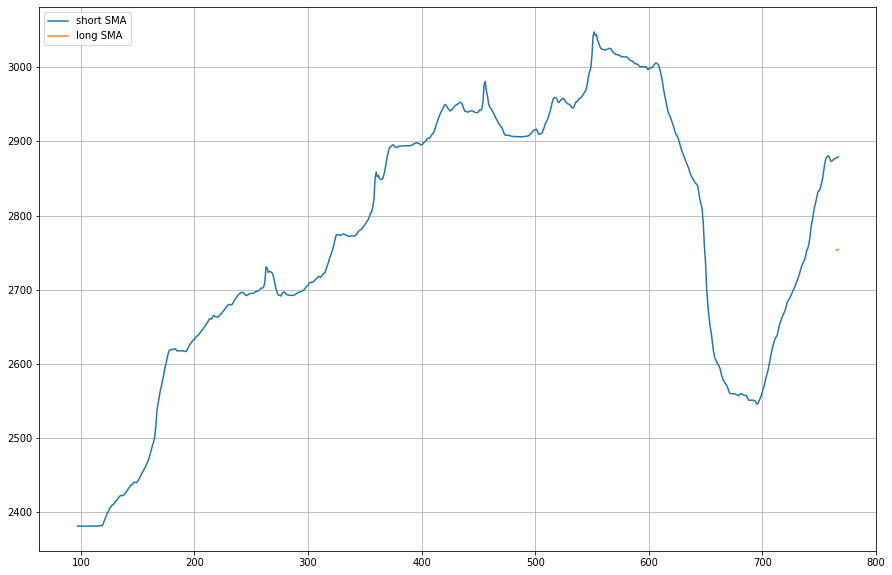

In [14]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(short_rolling,label='short SMA')
plt.plot(long_rolling,label='long SMA')
plt.legend(loc=2)
#Displaying a graph for both the moving averages

**EDA - Bar Charts and Line Charts**

We will now plot area price v/s date of the last 8 days for seeing variations and drawing insights

X-axis : Dates

Y-axis : Area Prices

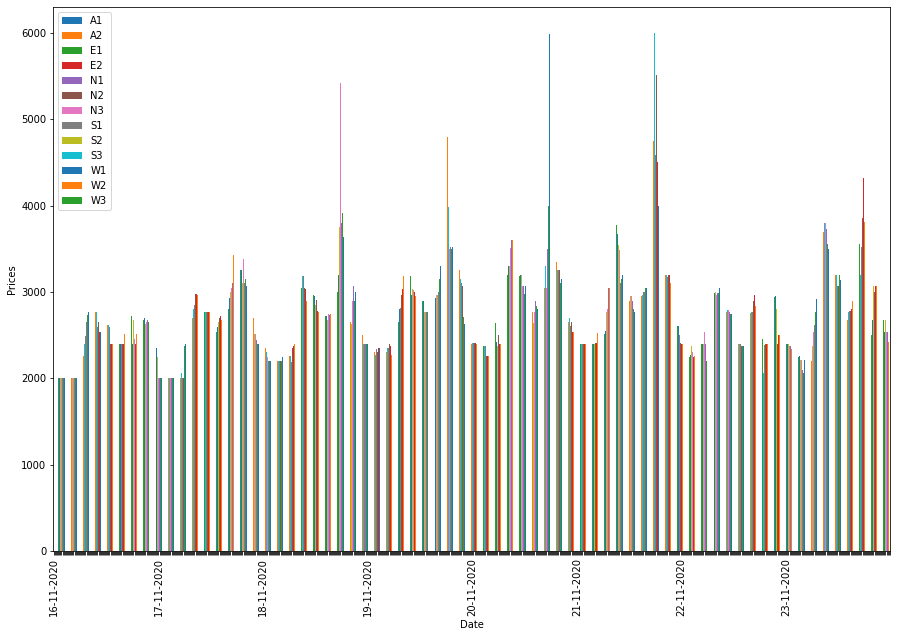

In [15]:

df.plot(x="Date", y=["A1", "A2", "E1","E2","N1","N2","N3","S1","S2","S3","W1","W2","W3"], kind="bar", figsize=(15,10), ylabel="Prices")
#Using pandas for EDA , here: plotting a bar graph

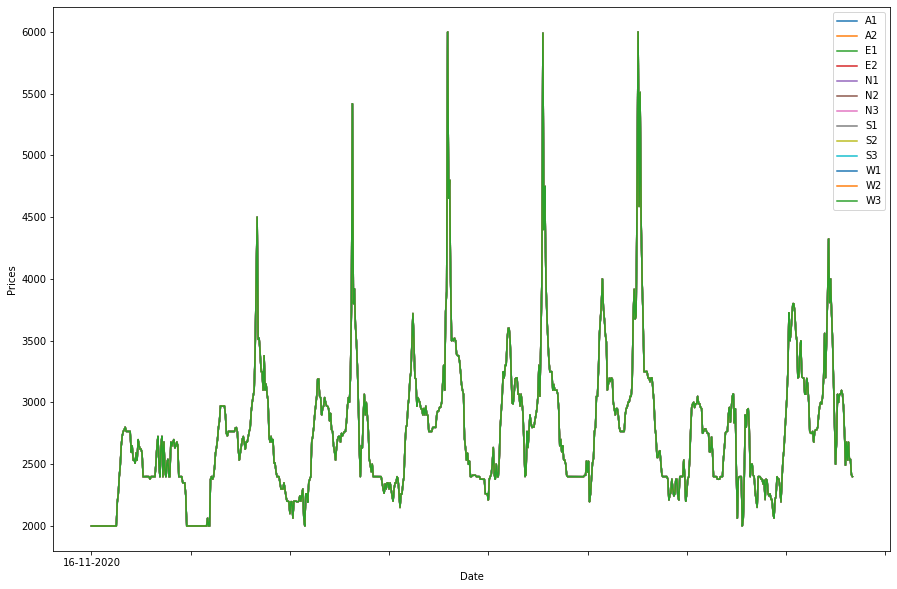

In [16]:

df.plot(x="Date", y=["A1", "A2", "E1","E2","N1","N2","N3","S1","S2","S3","W1","W2","W3"], kind="line", figsize=(15,10), ylabel="Prices")
#Using pandas for EDA , here: plotting a line graph